In [1]:
#!pip install fbprophet

In [2]:
#!pip install plotly

In [3]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
data = pd.read_csv("daily_minimum_temperatures.csv", sep=",")
print(data.shape)
data.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


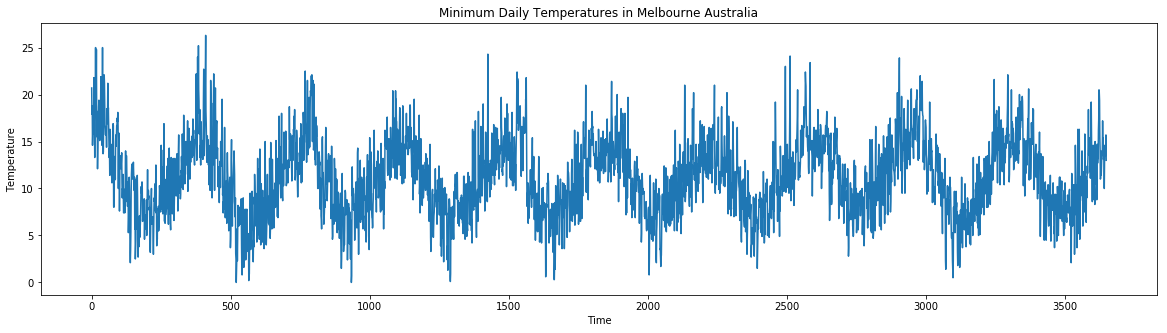

In [5]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [6]:
train_percentage = 0.67
train_size = int(len(data)*train_percentage)

train = data[:train_size]
test = data[train_size:]
train = train.rename(columns={'Date': 'ds', 'Temp': 'y'}) #columns names: "ds" and "y" https://facebook.github.io/prophet/docs/quick_start.html#python-api
test = test.rename(columns={'Date': 'ds', 'Temp': 'y'})
print(train.shape)
train.head()

(2445, 2)


,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
prophet_basic = Prophet()
prophet_basic.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
predictions = prophet_basic.make_future_dataframe(periods=test.shape[0]+1)
predictions.tail(2)

,ds
3649,1990-12-30
3650,1990-12-31


In [9]:
predictions = prophet_basic.predict(predictions)
predictions.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3646,1990-12-27,10.366014,10.010077,17.009555,9.824297,10.872548,3.108427,3.108427,3.108427,-0.163845,-0.163845,-0.163845,3.272272,3.272272,3.272272,0.0,0.0,0.0,13.474441
3647,1990-12-28,10.365739,10.160343,16.954099,9.823508,10.872655,3.317855,3.317855,3.317855,-0.032438,-0.032438,-0.032438,3.350293,3.350293,3.350293,0.0,0.0,0.0,13.683594
3648,1990-12-29,10.365465,10.141042,17.296982,9.822719,10.872762,3.386761,3.386761,3.386761,-0.037599,-0.037599,-0.037599,3.424360,3.424360,3.424360,0.0,0.0,0.0,13.752226
3649,1990-12-30,10.365190,10.325846,17.063082,9.821932,10.872851,3.301382,3.301382,3.301382,-0.192036,-0.192036,-0.192036,3.493418,3.493418,3.493418,0.0,0.0,0.0,13.666572
3650,1990-12-31,10.364915,10.569192,17.794253,9.821147,10.872934,3.610559,3.610559,3.610559,0.054040,0.054040,0.054040,3.556520,3.556520,3.556520,0.0,0.0,0.0,13.975475


In [10]:
predictions[["ds", "yhat"]].dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [11]:
test['ds'] = pd.to_datetime(test['ds'])
results = pd.merge(test, predictions[["ds", "yhat"]], on = ["ds"], how='left')

In [12]:
results.tail()

,ds,y,yhat
1200,1990-12-27,14.0,13.474441
1201,1990-12-28,13.6,13.683594
1202,1990-12-29,13.5,13.752226
1203,1990-12-30,15.7,13.666572
1204,1990-12-31,13.0,13.975475


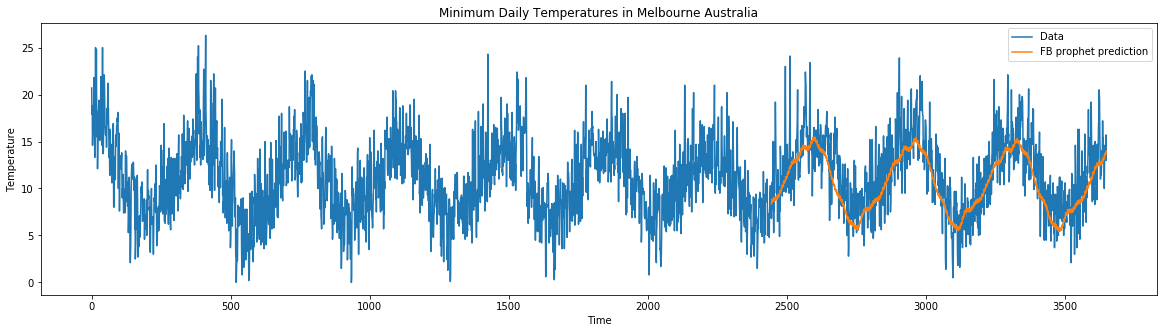

In [13]:
index_start = len(train)
index_end = len(train) + len(test)
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data")
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction")
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

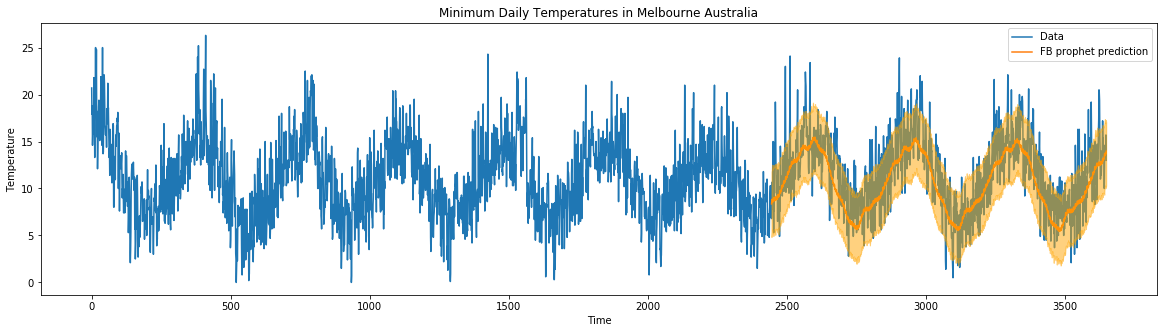

In [14]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data", zorder = 1)
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction", zorder = 2)
plt.fill_between(range(len(train), len(train) + len(test)), predictions.yhat_lower.values[index_start:index_end], predictions.yhat_upper.values[index_start:index_end], alpha=0.5, color ="orange", zorder = 3)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [15]:
mean_squared_error(results.y, results.yhat)

8.239936336311873